
 <center>
    <img src=https://www.cct.ie/wp-content/uploads/CCT_Logo_New_Aug_17-2.jpg width=400>
</center>

<div style="text-align: center"> <span style="font-size:28px;"><b>CCT College Dublin Continuous Assessment</b> </span></div>

<span style="font-size:16px;"> 
<div style="text-align: right">
<br><b>Course:</b> 
<br>Higher Diploma in Data Analytics for Business
<br>
<br><b>Module Title:</b>
<br>Machine Learning for Business
<br>
<br><b>Lecturer:</b>
<br>Dr.Muhammad Iqbal

<br>

# Project:

<i><span style="font-size:16px;"> An investors group is looking for a new promise for the next season, based on 2020 season's results. They have hired a Data Analysts Team to explore the results and to come up with a list of younger players who performed better in the 2020 season.
<i>

<br>
<b>Business Understanding</b><br> 
<b>Data Understanding</b><br> 
<b>Data Preparation</b><br>
- Scaler <br>
- PCA<br>
- Number of Cluster<br>
<b>Cluster</b><br>
  - Understanding the Clusters<br>
  - Preparation a new DataFrame to Classificacion ML<br>
  - Data Visualization on the Clusters<br>
<b>Applying Machine Learning</b><br>
  - Results<br> 
<b>References</b><br>

# Business understanding

#### Business Understanding:


An investors group is looking for a new promise for the next season, based on 2020 season's results. They have hired a Data Analysts Team to explore the results and to come up with a list of younger players who performed better in the 2020 season.

In the sports field, the values of Players can have astronomical prices, athletes are true pop stars of the sport. In this context, it was necessary to understand the relevance of the variables in measuring the success of these players in the game, and create a classification among them based on these results. Soon after, separate these players by similarity groups, once these groups are created, identify them and create a classification model between players who presented normal results and players who presented excellent results. I pay particular attention to younger players, because as we can see in the analysis, the peak of a basketball player occurs in the average age between 25 and 27 years old. What is very interesting for investors to keep an eye out for younger players who already have the potential of more experienced and successful players.


#### Business objective: 

1. Get a list of players who can be promising for the next season?
2. Get a player ranking modeling.

#### Business Questions:

Which player can be signed for next season?

# Data Understanding

#### EXPLORATORY DATA ANALYSIS

- The first thing that has to be done is to load the libraries, which are going to allow to do all the analysis in Jupyter Notebook:

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure

- We are going to work with a data set called "all_seasons.csv". We are going to import the file into Jupyter Notebook through Pandas and we are going to call it "df".

In [2]:
# reading the dataset
df = pd.read_csv('all_seasons.csv')

#### Variables Dictionary
* Unnamed: Index;
* player_name: Player's Name;
* team_abbreviation: Team that the player plays for;
* age: Player's Age;
* player_height: Player's Height;
* player_weight: Player's Weight;
* college: College where the player Studied;
* country: Country that the player was born;
* draft_year: Year of selection of the player;
* draft_round: Round of draft (1st or 2nd);
* draft_number: Player's position in the draft;
* gp: Number of games played by the player;
* pts: Points scored;
* reb: Rebounds;
* ast: Assists;
* net_rating: The rate of how much better or worse the team was when the player was on the court;
* oreb_pct: Offensive rebounds percentage;
* dreb_pct: Defensive rebounds percentage;
* usg_pct: Estimate of the percentage of team plays used by a player while he was on the floor;
* ts_pct: True Shooting percentage;
* ast_pct: Assists percentage;
* season: Season that the player played.

- The function info() shows more details about the dataset, such as shape, type of variables and memory used.

In [3]:
# getting information about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

- The function head(-5) shows by default the first and the last 5 entries in the dataset. The argument can be changed and it allows to see more rows in the dataset.

In [4]:
# checking the dataframe
df.head(-5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,11690,Marvin Bagley III,SAC,22.0,210.82,106.594120,Duke,USA,2018,1,...,14.1,7.4,1.0,-3.7,0.092,0.188,0.229,0.554,0.057,2020-21
11691,11691,Mason Jones,PHI,22.0,193.04,90.718400,Arkansas,USA,Undrafted,Undrafted,...,5.3,1.7,1.3,-9.9,0.018,0.145,0.217,0.556,0.211,2020-21
11692,11692,Mason Plumlee,DET,31.0,210.82,115.212368,Duke,USA,2013,1,...,10.4,9.3,3.6,-4.9,0.095,0.264,0.163,0.638,0.205,2020-21
11693,11693,Matisse Thybulle,PHI,24.0,195.58,91.171992,Washington,USA,2019,1,...,3.9,1.9,1.0,4.6,0.023,0.070,0.090,0.508,0.064,2020-21


- The function describe() shows the distribution of variables, including mean, median, min, max, and the quartiles. It can be seen that the average age of the players shown in the dataset is 27.13 years. The average height og the players is 200.72 cm. The highest number of matches in a season was 85.

In [5]:
# checking the data's statistic measures
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


- There is no missing values.

In [6]:
# checking if there is any missing values
df.isna().sum().sum()

0

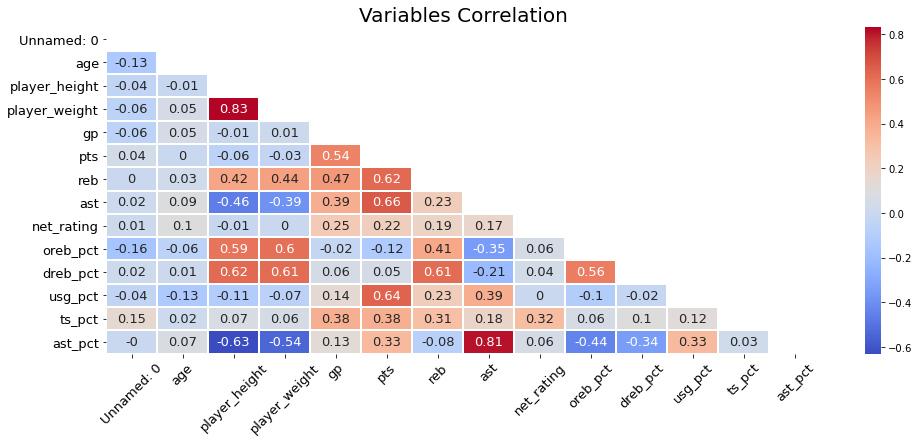

In [7]:
df_corr=df.corr()
plt.figure(figsize=(16,6))

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr.round(2), annot = True, mask = mask, cmap = 'coolwarm', annot_kws = {"size": 13}, linewidths=1)
plt.title('Variables Correlation', fontsize=20)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(df_corr.shape[1],0);
plt.show()

In [8]:
# checking the correlation of variables
plt.figure(figsize=(13,7))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
Unnamed: 0,1.000000,-0.126364,-0.039355,-0.057567,-0.062466,0.042203,0.002088,0.021111,0.007687,-0.158337,0.018098,-0.038613,0.146872,-0.004699
age,-0.126364,1.000000,-0.011678,0.052119,0.049585,0.002873,0.031416,0.086853,0.096820,-0.060633,0.014843,-0.127949,0.022131,0.066615
player_height,-0.039355,-0.011678,1.000000,0.827301,-0.005329,-0.060524,0.422356,-0.457367,-0.008723,0.590928,0.615384,-0.109527,0.069618,-0.625888
player_weight,-0.057567,0.052119,0.827301,1.000000,0.012496,-0.030655,0.437403,-0.387343,0.000612,0.604062,0.607750,-0.071879,0.062474,-0.540902
gp,-0.062466,0.049585,-0.005329,0.012496,1.000000,0.538367,0.468870,0.385596,0.254051,-0.020495,0.060785,0.138849,0.377679,0.134810
pts,0.042203,0.002873,-0.060524,-0.030655,0.538367,1.000000,0.622818,0.656564,0.221002,-0.124345,0.050246,0.638037,0.378961,0.330269
reb,0.002088,0.031416,0.422356,0.437403,0.468870,0.622818,1.000000,0.231678,0.193027,0.410619,0.611215,0.225592,0.312843,-0.078836
ast,0.021111,0.086853,-0.457367,-0.387343,0.385596,0.656564,0.231678,1.000000,0.167207,-0.346569,-0.207846,0.387400,0.177817,0.806682
net_rating,0.007687,0.096820,-0.008723,0.000612,0.254051,0.221002,0.193027,0.167207,1.000000,0.056778,0.043275,0.000476,0.318076,0.061723
oreb_pct,-0.158337,-0.060633,0.590928,0.604062,-0.020495,-0.124345,0.410619,-0.346569,0.056778,1.000000,0.557682,-0.101293,0.058805,-0.438385


<Figure size 936x504 with 0 Axes>

- Some insights:
    - 'dreb_pct' and 'oreb_pct' have a strong positive correlation to player_height - taller players tend to get more rebounds;
    - 'player_height' and 'ast_pct' are negatively correlated - shorter players tend to have higher assist percentages, which makes sense, since guards will mostly be handling the ball;
    - 'pts' is strongly correlated to 'ast' and 'reb' - a player who scores more points usually plays in the offensive system, thus tending to get more rebounds and provide more assists.

- Having a quick look at some plots, such as age and height distribution, age and height average by season, points x age.

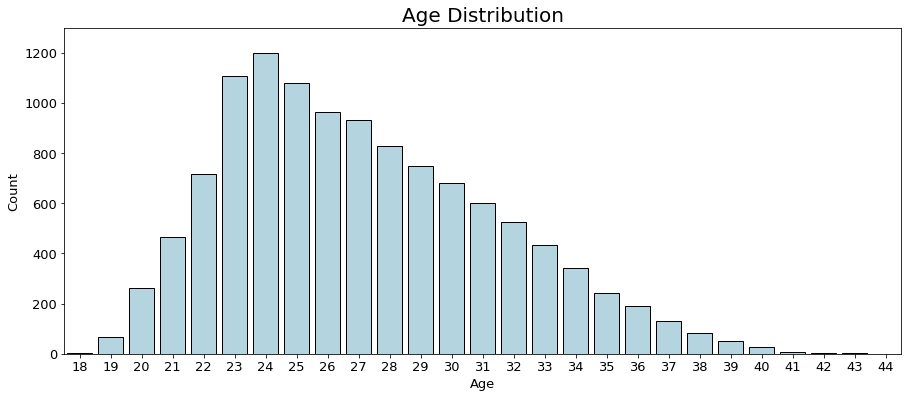

In [9]:
df['age'] = df['age'].astype(int)
plt.figure(figsize=(15,6))
sns.countplot(data=df, x = "age", color='lightblue', edgecolor='black')
plt.title('Age Distribution', fontsize='20')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,1300)
plt.show()

- The most common age showed in the dataset is 24 years old.

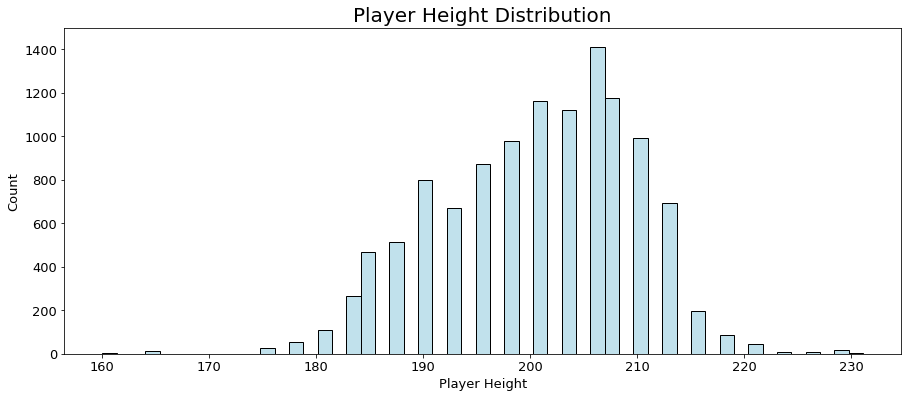

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(df.player_height, color='lightblue', edgecolor='black')
plt.title('Player Height Distribution', fontsize='20')
plt.xlabel('Player Height', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,1500)
plt.show()

- Most of the players have their height between 200 and 210 cm.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


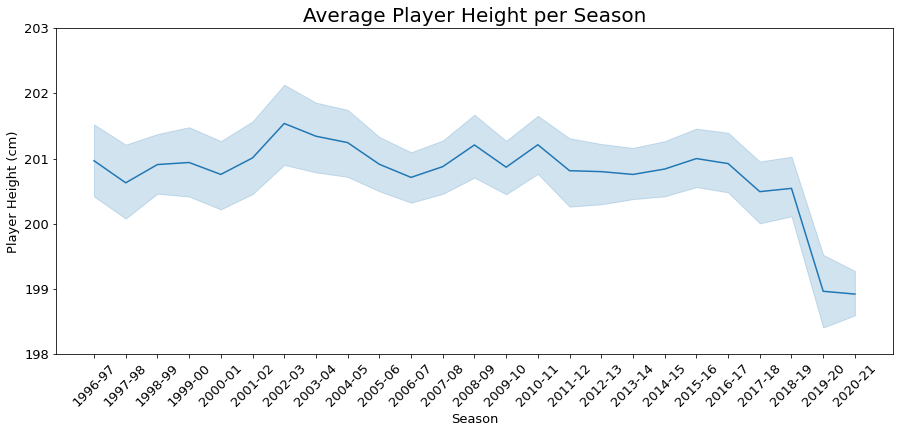

In [11]:
def visualize_average_trend(col):
    team_total_players = pd.DataFrame(df.groupby(['team_abbreviation', 'season'])[col].mean())
    team_total_players = team_total_players.rename({'player_name': f'Average {col}'}, axis=1)
    team_total_players.reset_index().head()
    plt.figure(figsize=(15,6))

    sns.lineplot('season', col, data=team_total_players)
    
    title = (' '.join(col.split('_'))).title()

    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('Player Height (cm)', fontsize=13)
    plt.xlabel('Season',fontsize=13)
    plt.title(f'Average {title} per Season', fontsize=20)
    plt.ylim(198,203)
    plt.show()
visualize_average_trend('player_height')
plt.show()

- The average NBA player height seems to have gone through a downward trend. The success of small-ball lineups featured by the Golden State Warriors in their famed 73-9 season is a strong driving force for this movement. Perhaps the importance of the three point shot in today's game also contributed to the tendency of teams prioritizing sharpshooters instead of big men.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


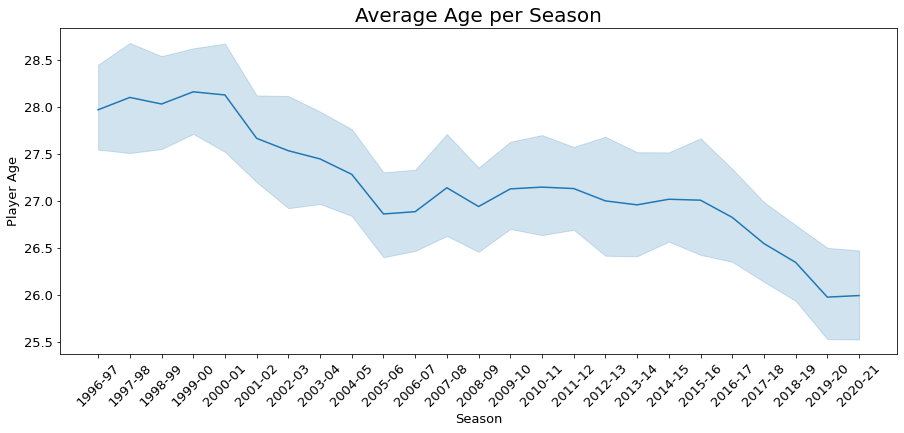

In [12]:
def visualize_average_trend(col):
    team_total_players = pd.DataFrame(df.groupby(['team_abbreviation', 'season'])[col].mean())
    team_total_players = team_total_players.rename({'player_name': f'Average {col}'}, axis=1)
    team_total_players.reset_index().head()
    plt.figure(figsize=(15,6))

    sns.lineplot('season', col, data=team_total_players)
    
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('Player Age', fontsize=13)
    plt.xlabel('Season',fontsize=13)
    plt.title('Average Age per Season', fontsize=20)
    plt.show()
visualize_average_trend('age')

- That is interesting. The average age for an NBA team has gone down by almost 2 years over the past 25 years. It seems like teams have an increased tendency to invest in their younger players. The youth is the future, and it seems like the future is here to stay.

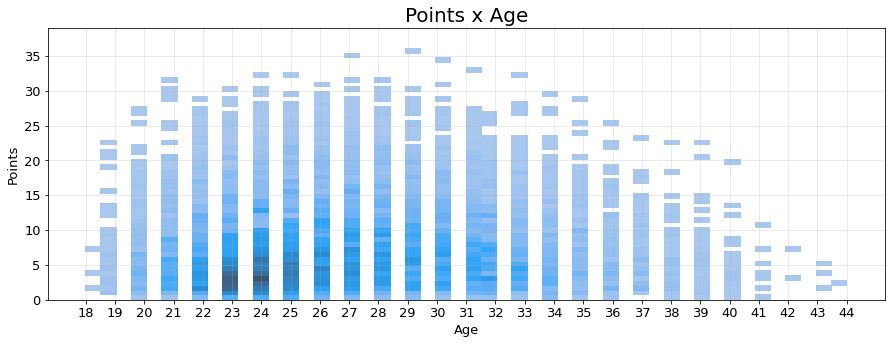

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(x = df['age'], y = df['pts'])
plt.title('Points x Age', fontsize=20)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.xticks(df['age'].unique(), fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,39)
plt.grid(alpha = 0.3)
plt.show()

- It is possible to see that the players who have scored more than 25 points per match are in the age range between 20 and 36 years old. The most common range of points scored was between 1 and 7, by players that are between 23 and 24 years old.

# DATA PREPARATION

- The project will be focused on the season 2020, aiming find a dream player for the season 2023. In order to start to work, it will be created a time range, taking in consideration the year of 2020. Applying the function str[] to leave just the first year of the season.

In [14]:
# filter year in the variable season
df['season'] = df['season'].str[:4]

# varaible season after filtered
df.season

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
11695    2020
11696    2020
11697    2020
11698    2020
11699    2020
Name: season, Length: 11700, dtype: object

In [15]:
# creating a new dataframe to focus on the season 2020
df = df[(df['season'] > '2019')]
df['season'].unique()

array(['2020'], dtype=object)

In [16]:
# shape
df.shape

(540, 22)

In [17]:
# selecting the variables of interest in accord with the correlation table and meaning of variables
df = df[['player_name','age','gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']]

# viewing the dataframe after select variables of interest
df.head()

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct
11160,Yogi Ferrell,28,10,5.6,1.9,2.2,0.034,0.095,0.229,0.193
11161,Zion Williamson,20,61,27.0,7.2,3.7,0.081,0.131,0.188,0.287
11162,Zeke Nnaji,20,42,3.2,1.5,0.2,0.034,0.129,0.037,0.126
11163,Zach LaVine,26,58,27.4,5.0,4.9,0.018,0.121,0.225,0.302
11164,Yuta Watanabe,26,50,4.4,3.2,0.8,0.046,0.171,0.079,0.121


In [18]:
# reseting the index
df.reset_index(drop=True, inplace=True)
df.head()

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct
0,Yogi Ferrell,28,10,5.6,1.9,2.2,0.034,0.095,0.229,0.193
1,Zion Williamson,20,61,27.0,7.2,3.7,0.081,0.131,0.188,0.287
2,Zeke Nnaji,20,42,3.2,1.5,0.2,0.034,0.129,0.037,0.126
3,Zach LaVine,26,58,27.4,5.0,4.9,0.018,0.121,0.225,0.302
4,Yuta Watanabe,26,50,4.4,3.2,0.8,0.046,0.171,0.079,0.121


In [19]:
# checking if there is any player appearing twice
df['player_name'].value_counts().unique()

array([1], dtype=int64)

- There is no player appearing twice.

# Scaler

In [20]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform data (without the variable player_name)
df_norm = df[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']] = norm.fit_transform(df[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']])

# print
df_norm

array([[0.12676056, 0.175     , 0.13286713, ..., 0.24675325, 0.48008386,
        0.47851003],
       [0.84507042, 0.84375   , 0.5034965 , ..., 0.34025974, 0.39412998,
        0.747851  ],
       [0.57746479, 0.1       , 0.1048951 , ..., 0.33506494, 0.07756813,
        0.28653295],
       ...,
       [0.53521127, 0.190625  , 0.07692308, ..., 0.18961039, 0.15513627,
        0.43839542],
       [0.78873239, 0.41875   , 0.28671329, ..., 0.34545455, 0.11740042,
        0.48137536],
       [0.69014085, 0.3875    , 0.3986014 , ..., 0.38961039, 0.34591195,
        0.51002865]])

In [21]:
# tranform the array in dataframe

df2 = pd.DataFrame(df_norm)
df2.columns = ['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']
df2

,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct
0,0.126761,0.175000,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510
1,0.845070,0.843750,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851
2,0.577465,0.100000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533
3,0.802817,0.856250,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831
4,0.690141,0.137500,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206
...,...,...,...,...,...,...,...,...
535,0.169014,0.087500,0.125874,0.384615,0.182390,0.220779,0.706499,0.283668
536,0.507042,0.162500,0.167832,0.102564,0.106918,0.251948,0.148847,0.252149
537,0.535211,0.190625,0.076923,0.051282,0.069182,0.189610,0.155136,0.438395
538,0.788732,0.418750,0.286713,0.085470,0.157233,0.345455,0.117400,0.481375


In [22]:
# salvando o nome dos jogadores em um objeto chamado df

df = df[['player_name','age']]
df

,player_name,age
0,Yogi Ferrell,28
1,Zion Williamson,20
2,Zeke Nnaji,20
3,Zach LaVine,26
4,Yuta Watanabe,26
...,...,...
535,Matthew Dellavedova,30
536,Maurice Harkless,28
537,Max Strus,25
538,Marcus Morris Sr.,31


In [23]:
# concat the dataframes

# new frame alredy scaled 
df = pd.concat([df,df2], axis=1)
df

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct
0,Yogi Ferrell,28,0.126761,0.175000,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510
1,Zion Williamson,20,0.845070,0.843750,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851
2,Zeke Nnaji,20,0.577465,0.100000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533
3,Zach LaVine,26,0.802817,0.856250,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831
4,Yuta Watanabe,26,0.690141,0.137500,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206
...,...,...,...,...,...,...,...,...,...,...
535,Matthew Dellavedova,30,0.169014,0.087500,0.125874,0.384615,0.182390,0.220779,0.706499,0.283668
536,Maurice Harkless,28,0.507042,0.162500,0.167832,0.102564,0.106918,0.251948,0.148847,0.252149
537,Max Strus,25,0.535211,0.190625,0.076923,0.051282,0.069182,0.189610,0.155136,0.438395
538,Marcus Morris Sr.,31,0.788732,0.418750,0.286713,0.085470,0.157233,0.345455,0.117400,0.481375


# PCA


<i><span style="font-size:16px;"> We did not opt for the reduction of dimensionality through the PCA, because after the application of the technique, the interpretation of the results in relation to the nomenclature of the variables was not clear, and the results obtained were equivalent with the use of the technique and without the use of it. However, our dataset after the selection of the season is small, which gives us this freedom not to carry out the reduction of dimensionality. However, we recommend using the technique if the analysis is applied to a medium or large dataset.
<i>

In [24]:
#from sklearn.decomposition import PCA
#from sklearn import preprocessing
#import matplotlib.pyplot as plt

In [25]:
#df2 = df.copy()
#df2

In [26]:
#df2.drop('player_name', axis=1, inplace=True)

In [27]:
#pca = PCA().fit(df2)

# Number of Clusters

In [28]:
# importing KMeans
from sklearn.cluster import KMeans

In [29]:
# filtering the variables
df_c = df[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']]
df_c

,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct
0,0.126761,0.175000,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510
1,0.845070,0.843750,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851
2,0.577465,0.100000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533
3,0.802817,0.856250,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831
4,0.690141,0.137500,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206
...,...,...,...,...,...,...,...,...
535,0.169014,0.087500,0.125874,0.384615,0.182390,0.220779,0.706499,0.283668
536,0.507042,0.162500,0.167832,0.102564,0.106918,0.251948,0.148847,0.252149
537,0.535211,0.190625,0.076923,0.051282,0.069182,0.189610,0.155136,0.438395
538,0.788732,0.418750,0.286713,0.085470,0.157233,0.345455,0.117400,0.481375


In [30]:
# creating a range of clusters
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(df_c)
    
    
    ssd.append(model.inertia_)  # ss point --> cluster center

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

In [31]:
# ssd result (it can be observed the difference of values between the clustes) 
# big difference can be a point of cut-off
ssd

[113.63790468461696,
 90.14183987659257,
 73.18214425179966,
 66.38611699633525,
 60.97076410547257,
 56.741139738113354,
 53.6940415836425,
 51.35787811677608]

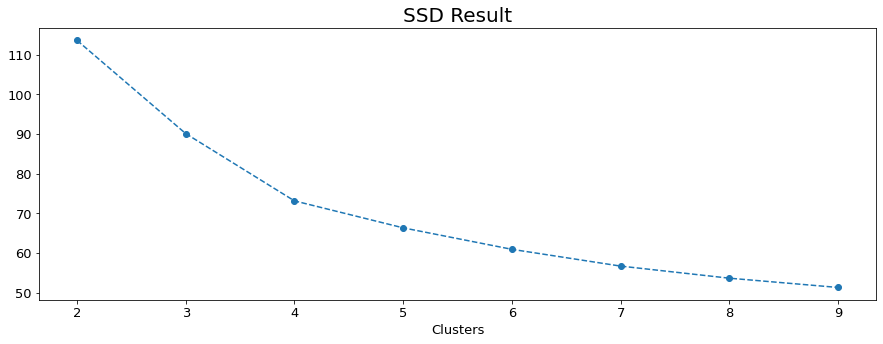

In [32]:
# visualizing the ssd results in a plot

plt.figure(figsize=(15,5))
plt.plot(range(2,10), ssd, 'o--')
plt.title('SSD Result', fontsize=20)
plt.ylabel('',fontsize=13)
plt.xlabel('Clusters', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [33]:
# all ssd results per number of cluster
pd.Series(ssd)

0    113.637905
1     90.141840
2     73.182144
3     66.386117
4     60.970764
5     56.741140
6     53.694042
7     51.357878
dtype: float64

In [34]:
# difference between the sdd results
pd.Series(ssd).diff()

0          NaN
1   -23.496065
2   -16.959696
3    -6.796027
4    -5.415353
5    -4.229624
6    -3.047098
7    -2.336163
dtype: float64

# FIT & PREDICT - CLUSTERS

In [35]:
# defining number of clusters
model = KMeans(n_clusters=5, init = 'k-means++', random_state = 1)

In [36]:
# fit_transform
cluster_labels = model.fit_predict(df_c)
cluster_labels

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 2, 1, 2, 4, 4, 3, 4, 1, 1, 2, 0, 4, 4, 0, 4, 4, 1, 1, 0, 4, 1,
       4, 2, 1, 3, 2, 2, 0, 1, 4, 4, 1, 4, 4, 0, 4, 3, 4, 0, 1, 0, 2, 0,
       1, 4, 2, 2, 0, 4, 4, 4, 2, 3, 4, 4, 3, 3, 1, 1, 0, 4, 4, 0, 1, 3,
       4, 1, 4, 4, 0, 1, 0, 0, 1, 0, 3, 1, 3, 0, 1, 3, 1, 1, 2, 0, 4, 2,
       4, 4, 2, 1, 1, 1, 4, 2, 4, 4, 2, 3, 4, 2, 3, 1, 4, 2, 4, 1, 4, 3,
       1, 4, 3, 1, 4, 3, 4, 2, 0, 3, 4, 3, 4, 4, 4, 0, 1, 4, 3, 4, 1, 0,
       4, 0, 2, 4, 0, 1, 2, 4, 4, 2, 3, 4, 3, 3, 4, 4, 1, 4, 2, 3, 4, 2,
       1, 1, 4, 3, 0, 0, 4, 4, 1, 2, 4, 1, 4, 0, 4, 2, 1, 1, 1, 4, 4, 1,
       1, 2, 0, 4, 4, 0, 4, 3, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 2, 2, 0, 0,
       1, 0, 1, 3, 1, 0, 3, 2, 1, 4, 1, 1, 4, 4, 2, 1, 0, 4, 2, 1, 4, 3,
       4, 2, 3, 4, 3, 1, 2, 4, 4, 2, 1, 4, 3, 4, 2, 4, 4, 4, 0, 3, 0, 1,
       4, 1, 1, 1, 0, 3, 1, 2, 0, 3, 4, 3, 4, 2, 3, 2, 2, 4, 0, 2, 4, 0,
       1, 1, 0, 2, 4, 4, 4, 0, 0, 1, 3, 2, 4, 1, 3, 0, 3, 1, 4, 1, 1, 0,
       4, 4, 3, 4, 2, 1, 4, 4, 1, 1, 4, 4, 3, 4, 2,

In [37]:
# including the column 'Cluster' in the dataframe
df_c["Cluster"] = cluster_labels
df_c.head()

<ipython-input-37-7e6d4303e8e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["Cluster"] = cluster_labels


,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
0,0.126761,0.17500,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510,1
1,0.845070,0.84375,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851,2
2,0.577465,0.10000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533,1
3,0.802817,0.85625,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831,2
4,0.690141,0.13750,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206,4


In [38]:
# concatenating the dataframes
df = pd.concat([df[['player_name','age']],df_c], axis=1)
df_copy = df.copy()
df.head()

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
0,Yogi Ferrell,28,0.126761,0.17500,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510,1
1,Zion Williamson,20,0.845070,0.84375,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851,2
2,Zeke Nnaji,20,0.577465,0.10000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533,1
3,Zach LaVine,26,0.802817,0.85625,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831,2
4,Yuta Watanabe,26,0.690141,0.13750,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206,4


In [39]:
# checking the number of unique clusters
df.Cluster.unique()

array([1, 2, 4, 3, 0])

In [40]:
# shape
df.shape

(540, 11)

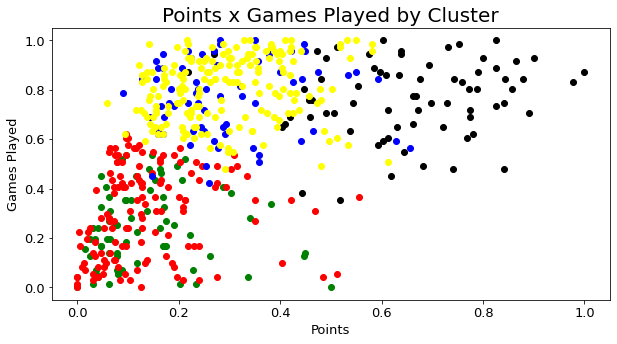

In [41]:
# plotting the Clusters
cluster_0 = df[(df['Cluster'] == 0)]
cluster_1 = df[(df['Cluster'] == 1)]
cluster_2 = df[(df['Cluster'] == 2)]
cluster_3 = df[(df['Cluster'] == 3)]
cluster_4 = df[(df['Cluster'] == 4)]

plt.figure(figsize=(10,5))
a = plt.scatter(cluster_0.pts,cluster_0['gp'],color='green')
b = plt.scatter(cluster_1.pts,cluster_1['gp'],color='red')
c = plt.scatter(cluster_2.pts,cluster_2['gp'],color='black')
d = plt.scatter(cluster_3.pts,cluster_3['gp'],color='blue')
e = plt.scatter(cluster_4.pts,cluster_4['gp'],color='yellow')
plt.title('Points x Games Played by Cluster', fontsize=20)
plt.xlabel('Points', fontsize=13)
plt.ylabel('Games Played', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

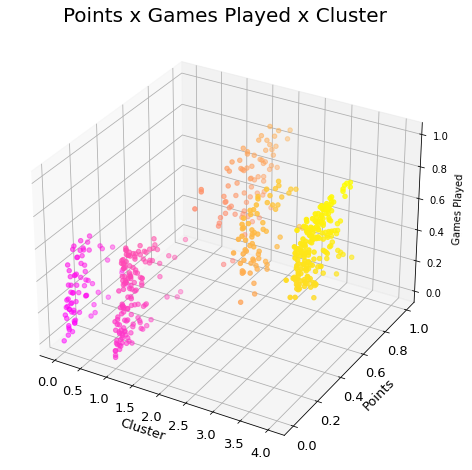

In [42]:
# plot 3D

figure(figsize=(8,8))

x = df['Cluster']
y = df['pts']
z = df['gp']
color_map = plt.get_cmap('spring')
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=(x+y+z), cmap=color_map)
plt.title('Points x Games Played x Cluster', fontsize = 20)
plt.xlabel('Cluster', fontsize = 13)
plt.ylabel('Points', fontsize = 13)
ax.set_zlabel('Games Played')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

# Getting the means of the Clusters

In [43]:
cluster_0.mean(numeric_only=True)

age         25.082192
gp           0.244453
pts          0.137586
reb          0.206725
ast          0.059829
oreb_pct     0.483329
dreb_pct     0.449030
ast_pct      0.181500
usg_pct      0.407230
Cluster      0.000000
dtype: float64

In [44]:
cluster_1.mean(numeric_only=True)

age         25.092199
gp           0.302168
pts          0.139007
reb          0.120865
ast          0.095654
oreb_pct     0.138008
dreb_pct     0.280869
ast_pct      0.256419
usg_pct      0.385560
Cluster      1.000000
dtype: float64

In [45]:
cluster_2.mean(numeric_only=True)

age         27.125000
gp           0.768779
pts          0.649523
reb          0.400447
ast          0.483856
oreb_pct     0.182477
dreb_pct     0.365115
ast_pct      0.559515
usg_pct      0.680516
Cluster      2.000000
dtype: float64

In [46]:
cluster_3.mean(numeric_only=True)

age         26.567164
gp           0.763927
pts          0.292584
reb          0.471454
ast          0.109580
oreb_pct     0.621984
dreb_pct     0.534638
ast_pct      0.182202
usg_pct      0.416927
Cluster      3.000000
dtype: float64

In [47]:
cluster_4.mean(numeric_only=True)

age         26.390374
gp           0.802742
pts          0.293533
reb          0.239108
ast          0.169523
oreb_pct     0.167323
dreb_pct     0.305216
ast_pct      0.262200
usg_pct      0.413803
Cluster      4.000000
dtype: float64

# Preparation new dataframe with the mean of clusters

In [48]:
# new dataframe with the mean of clusters

cluster_0_mean = cluster_0.mean(numeric_only=True).to_frame().reset_index()
cluster_0_mean.columns = ["Legenda", "Cluster 0"]
cluster_1_mean = cluster_1.mean(numeric_only=True).to_frame().reset_index()
cluster_1_mean.columns = ["Legenda", "Cluster 1"]
cluster_2_mean = cluster_2.mean(numeric_only=True).to_frame().reset_index()
cluster_2_mean.columns = ["Legenda", "Cluster 2"]
cluster_3_mean = cluster_3.mean(numeric_only=True).to_frame().reset_index()
cluster_3_mean.columns = ["Legenda", "Cluster 3"]
cluster_4_mean = cluster_4.mean(numeric_only=True).to_frame().reset_index()
cluster_4_mean.columns = ["Legenda", "Cluster 4"]

# merge datraframes
new_frame_1 = pd.merge(cluster_0_mean, cluster_1_mean, on='Legenda', how='outer')
new_frame_2 = pd.merge(cluster_2_mean, cluster_3_mean, on='Legenda', how='outer')
new_frame_3 = pd.merge(new_frame_1, new_frame_2, on='Legenda', how='outer')
mean_clusters = pd.merge(new_frame_3, cluster_4_mean, on='Legenda', how='outer')

# datframe
mean_clusters.head(20)

,Legenda,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,age,25.082192,25.092199,27.125000,26.567164,26.390374
1,gp,0.244453,0.302168,0.768779,0.763927,0.802742
2,pts,0.137586,0.139007,0.649523,0.292584,0.293533
3,reb,0.206725,0.120865,0.400447,0.471454,0.239108
4,ast,0.059829,0.095654,0.483856,0.109580,0.169523
5,oreb_pct,0.483329,0.138008,0.182477,0.621984,0.167323
6,dreb_pct,0.449030,0.280869,0.365115,0.534638,0.305216
7,ast_pct,0.181500,0.256419,0.559515,0.182202,0.262200
8,usg_pct,0.407230,0.385560,0.680516,0.416927,0.413803
9,Cluster,0.000000,1.000000,2.000000,3.000000,4.000000


In [49]:
# transposing rows to columns  
new_data = mean_clusters.T
new_data

,0,1,2,3,4,5,6,7,8,9
Legenda,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
Cluster 0,25.0822,0.244453,0.137586,0.206725,0.0598291,0.483329,0.44903,0.1815,0.40723,0
Cluster 1,25.0922,0.302168,0.139007,0.120865,0.0956538,0.138008,0.280869,0.256419,0.38556,1
Cluster 2,27.125,0.768779,0.649523,0.400447,0.483856,0.182477,0.365115,0.559515,0.680516,2
Cluster 3,26.5672,0.763927,0.292584,0.471454,0.10958,0.621984,0.534638,0.182202,0.416927,3
Cluster 4,26.3904,0.802742,0.293533,0.239108,0.169523,0.167323,0.305216,0.2622,0.413803,4


# New dataframe (cluster mean)

In [50]:
# renaming the columns
headers = new_data.iloc[0]
new_mean = pd.DataFrame(new_data.values[1:], columns=headers)
new_mean

Legenda,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
0,25.0822,0.244453,0.137586,0.206725,0.0598291,0.483329,0.44903,0.1815,0.40723,0
1,25.0922,0.302168,0.139007,0.120865,0.0956538,0.138008,0.280869,0.256419,0.38556,1
2,27.125,0.768779,0.649523,0.400447,0.483856,0.182477,0.365115,0.559515,0.680516,2
3,26.5672,0.763927,0.292584,0.471454,0.10958,0.621984,0.534638,0.182202,0.416927,3
4,26.3904,0.802742,0.293533,0.239108,0.169523,0.167323,0.305216,0.2622,0.413803,4


# Data Vizualizaton on the Cluster

## Looking for the cluster with the highest overall results in relation to the other clusters.

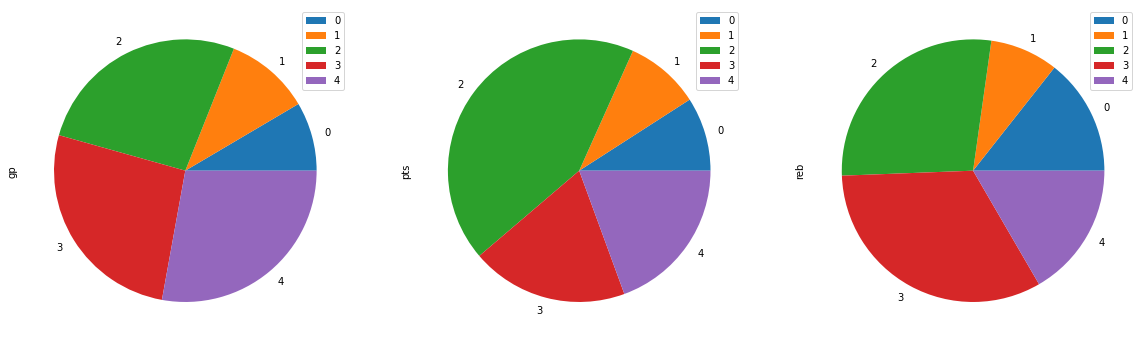

In [51]:
new_mean[['gp', 'pts', 'reb']].plot.pie(subplots=True, figsize=(20, 10));

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


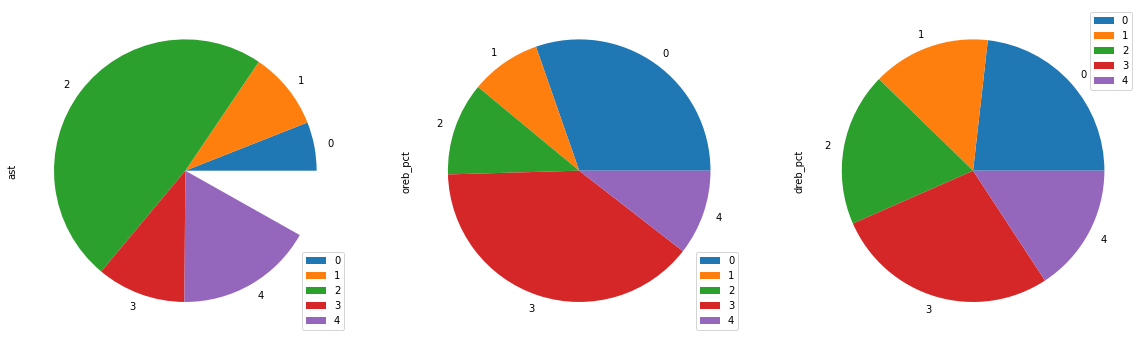

In [52]:
new_mean[['ast', 'oreb_pct', 'dreb_pct']].plot.pie(subplots=True, figsize=(20, 10));

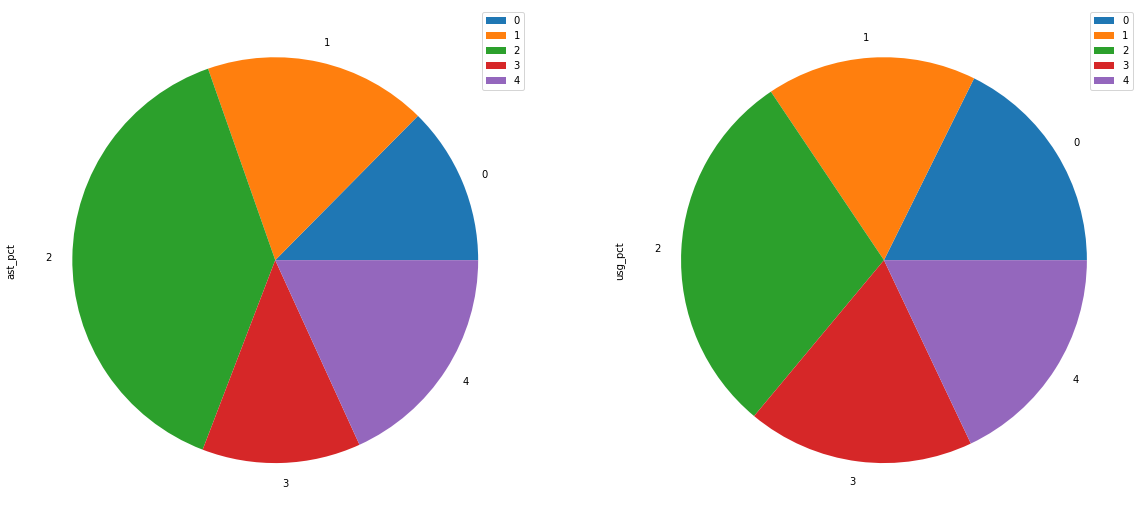

In [53]:
new_mean[['ast_pct', 'usg_pct']].plot.pie(subplots=True, figsize=(20, 10));

<AxesSubplot:>

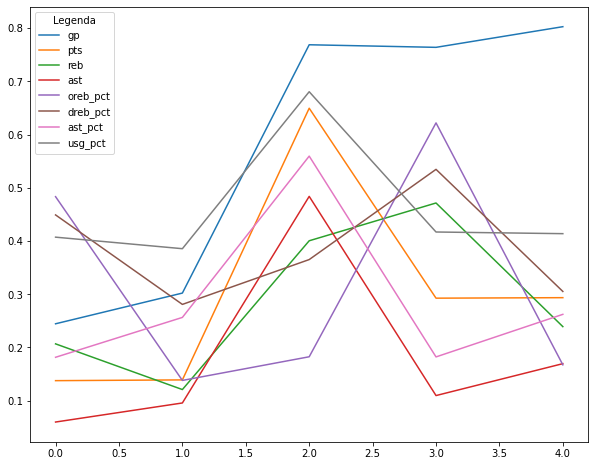

In [54]:
new_mean[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']].plot(figsize=(10, 8))

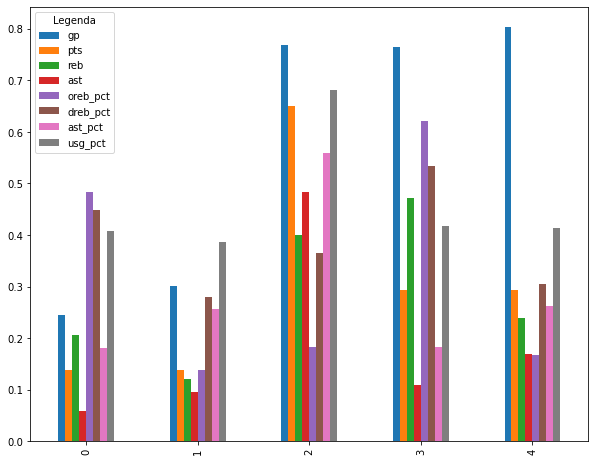

In [55]:
new_mean[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']].plot.bar(figsize=(10, 8));

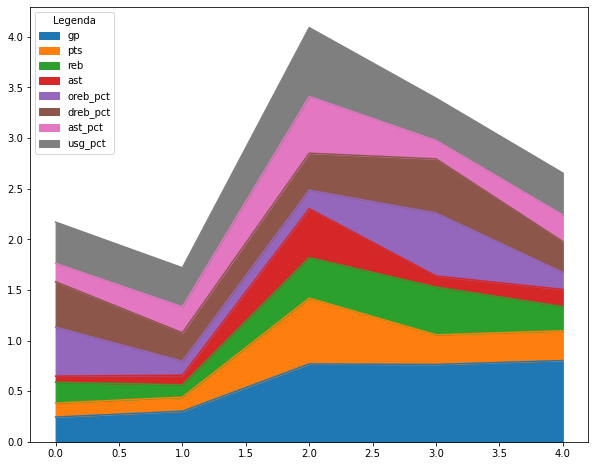

In [56]:
new_mean[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct']].plot.area(figsize=(10, 8));

### Conclusion: After analyzing the results of the averages of the variables, we observed that the clusters that have the highest results are number 2 and 3. 

### IMPORTANT: Usually it keeps the same, but is important every time that the notebook is runned, to check if the cluster number is the same, because it can be changed randomly. This does not change the results, only the naming of the groups, and a different number can be assigned to the cluster with the highest results.

## Observing the name of players under 21 years age per cluster

In [57]:
df_10=cluster_0[(cluster_0["age"] <= 20)].reset_index()
df_10.head(10)

,index,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
0,181,Alen Smailagic,20,0.197183,0.059375,0.076923,0.025641,0.408805,0.288312,0.163522,0.398281,0
1,359,Vernon Carey Jr.,20,0.253521,0.075000,0.097902,0.008547,0.339623,0.451948,0.058700,0.435530,0


In [58]:
df_20=cluster_1[(cluster_1["age"] <= 20)]
df_20.head(50)

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
2,Zeke Nnaji,20,0.577465,0.100000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533,1
82,Jay Scrubb,20,0.042254,0.275000,0.244755,0.025641,0.138365,0.363636,0.031447,0.547278,1
126,Jahmi'us Ramsey,20,0.169014,0.096875,0.055944,0.042735,0.119497,0.207792,0.184486,0.449857,1
353,Tyrell Terry,20,0.140845,0.031250,0.034965,0.042735,0.000000,0.306494,0.331237,0.312321,1
421,Killian Hayes,19,0.352113,0.212500,0.188811,0.452991,0.056604,0.238961,0.626834,0.455587,1
445,Josh Green,20,0.535211,0.081250,0.139860,0.059829,0.371069,0.285714,0.174004,0.246418,1
446,Josh Hall,20,0.281690,0.128125,0.195804,0.111111,0.100629,0.392208,0.247379,0.424069,1
501,Nico Mannion,20,0.408451,0.128125,0.104895,0.196581,0.100629,0.277922,0.566038,0.458453,1


In [59]:
df_30=cluster_2[(cluster_2["age"] <= 20)]
df_30.head(50)

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
1,Zion Williamson,20,0.845070,0.843750,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851,2
195,Anthony Edwards,19,1.000000,0.603125,0.328671,0.247863,0.144654,0.314286,0.297694,0.681948,2
433,LaMelo Ball,19,0.704225,0.490625,0.412587,0.521368,0.257862,0.418182,0.675052,0.633238,2


In [60]:
df_30=cluster_3[(cluster_3["age"] <= 20)]
df_30.head(50)

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
102,James Wiseman,20,0.535211,0.359375,0.405594,0.059829,0.396226,0.493506,0.104822,0.587393,3
112,Isaiah Stewart,20,0.943662,0.246875,0.468531,0.076923,0.660377,0.501299,0.134172,0.355301,3
311,Onyeka Okongwu,20,0.690141,0.143750,0.230769,0.034188,0.628931,0.446753,0.098532,0.329513,3
411,Kenyon Martin Jr.,20,0.619718,0.290625,0.377622,0.094017,0.396226,0.412987,0.142558,0.366762,3


In [61]:
df_40=cluster_4[(cluster_4["age"] <= 20)]
df_40.head(50)

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,Cluster
108,Isaac Okoro,20,0.929577,0.300000,0.216783,0.162393,0.194969,0.171429,0.180294,0.332378,4
120,Devin Vassell,20,0.859155,0.171875,0.195804,0.076923,0.132075,0.358442,0.148847,0.320917,4
122,Jaden McDaniels,20,0.873239,0.212500,0.258741,0.094017,0.201258,0.306494,0.134172,0.263610,4
180,Aleksej Pokusevski,19,0.619718,0.256250,0.328671,0.188034,0.157233,0.402597,0.278826,0.489971,4
228,Deni Avdija,20,0.746479,0.196875,0.342657,0.102564,0.106918,0.470130,0.134172,0.263610,4
296,Sekou Doumbouya,20,0.774648,0.159375,0.181818,0.068376,0.283019,0.303896,0.167715,0.429799,4
332,R.J. Hampton,20,0.704225,0.215625,0.244755,0.145299,0.188679,0.420779,0.324948,0.472779,4
337,Patrick Williams,19,0.985915,0.287500,0.321678,0.119658,0.207547,0.340260,0.142558,0.343840,4
355,Tyrese Maxey,20,0.845070,0.250000,0.118881,0.170940,0.069182,0.254545,0.433962,0.561605,4
384,Talen Horton-Tucker,20,0.901408,0.281250,0.181818,0.239316,0.119497,0.270130,0.438155,0.527221,4


<br>


# Applying Machine Learning

## Data Preparation to Machine Learning

<i><span style="font-size:16px;"> After selecting the group that presented the best results obtained through the interpretation of clusters. We created a target variable and assigned zero (0) to players with normal results to athletes with normal results obtained, and one (1) to athletes with better results (great players).<i>

### IMPORTANT, Here was selected the cluster number 2 and 3 as the clusters that obtained the best results. If the notebook is run again, you must confirm if is select the appropriate cluster number. (The 2 groups with the highest values)

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  540 non-null    object 
 1   age          540 non-null    int32  
 2   gp           540 non-null    float64
 3   pts          540 non-null    float64
 4   reb          540 non-null    float64
 5   ast          540 non-null    float64
 6   oreb_pct     540 non-null    float64
 7   dreb_pct     540 non-null    float64
 8   ast_pct      540 non-null    float64
 9   usg_pct      540 non-null    float64
 10  Cluster      540 non-null    int32  
dtypes: float64(8), int32(2), object(1)
memory usage: 42.3+ KB


In [63]:
# creating a target variable:  Clusters 0, 1, and 4, classify as 0. Cluster 2 and 3, classify as 1.
# clusters 0, 1 and 4 = normal players
# cluster 2 and 3 = Spetacular players

df_copy["Cluster"].replace(1,0, inplace=True)
df_copy["Cluster"].replace(4,0, inplace=True)
df_copy["Cluster"].replace(2,1, inplace=True)
df_copy["Cluster"].replace(3,1, inplace=True)

In [64]:
#rename the columns to player_type
df_copy.rename(columns={'Cluster':'player_type'}, inplace=True)
df_copy.head()

,player_name,age,gp,pts,reb,ast,oreb_pct,dreb_pct,ast_pct,usg_pct,player_type
0,Yogi Ferrell,28,0.126761,0.17500,0.132867,0.188034,0.213836,0.246753,0.480084,0.478510,0
1,Zion Williamson,20,0.845070,0.84375,0.503497,0.316239,0.509434,0.340260,0.394130,0.747851,1
2,Zeke Nnaji,20,0.577465,0.10000,0.104895,0.017094,0.213836,0.335065,0.077568,0.286533,0
3,Zach LaVine,26,0.802817,0.85625,0.349650,0.418803,0.113208,0.314286,0.471698,0.790831,1
4,Yuta Watanabe,26,0.690141,0.13750,0.223776,0.068376,0.289308,0.444156,0.165618,0.272206,0


# Number of players in each group.

In [65]:
df_copy.player_type.value_counts()

0    401
1    139
Name: player_type, dtype: int64

- Now the dataset is ready to apply the Machine Learning Models.

In [66]:
df = df_copy[['gp', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ast_pct', 'usg_pct', 'player_type']]

## Supervised Machine Learning to Classification

In [67]:
#loading machine learning models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# splitting the dataset

In [68]:
# splitting the dataset into a training set and a test set (in this case 30% is taken for testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df['player_type'], test_size= .30)
len(x_train)

378

# Training Models

In [69]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

In [70]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

In [72]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
acc_KNN = round(KNN.score(x_train,y_train)*100,2)

In [73]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

In [74]:
linear_svc =LinearSVC()
linear_svc.fit(x_train,y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train,y_train)*100,2)

In [75]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [76]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [77]:
LinearDiscriminant = LinearDiscriminantAnalysis()
LinearDiscriminant.fit(x_train, y_train)  
Y_pred = LinearDiscriminant.predict(x_test)  
acc_LinearDiscriminant = round(LinearDiscriminant.score(x_train, y_train) * 100, 2)

# Getting the Results in a Table

In [78]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'LDA'],
    'Score': [acc_linear_svc, acc_KNN, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree,acc_LinearDiscriminant]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
100.00,Support Vector Machines
100.00,KNN
100.00,Logistic Regression
100.00,Random Forest
100.00,Naive Bayes
100.00,Perceptron
100.00,Stochastic Gradient Decent
100.00,Decision Tree
92.33,LDA


# Conclusion

Most models, with the exception of the LDA, showed some overfitting, and this may have occurred due to the small amount of data in the sample and of variables used for analysis, due to the great difference in the characteristics of the data between the classes, making it interesting to test the modeling in large numbers of data and with more variables of interest. However, using LDA, we can evidence a satisfactory result of the model for an implementation and initial performance tests. Being interesting, tests the model created in a database with a larger sample, with more variables and athletes.

# References

##### All references used in this project are being presented through the technical report attached in PDF format along with this jupyter file notebook.